In [1]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
SYMBOL = 'btcusd'
PERIODS = '3600'

In [3]:
gemini_ticker = 'https://api.gemini.com/v1/pubticker/{}'
btc_data = requests.get(gemini_ticker.format(SYMBOL)).json()
print(json.dumps(btc_data, indent=4))

{
    "ask": "10543.90",
    "last": "10543.09",
    "bid": "10543.14",
    "volume": {
        "BTC": "2816.0638931691",
        "USD": "30648639.023805841503",
        "timestamp": 1565768700000
    }
}


    CloseTime  OpenPrice  HighPrice  LowPrice  ClosePrice      Volume  \
0  1563966000    9756.61    9756.61   9659.79     9700.91   12.887648   
1  1563969600    9694.71    9730.00   9613.91     9711.25   29.937726   
2  1563973200    9714.70    9761.76   9690.30     9747.51   56.285587   
3  1563976800    9747.51    9790.21   9667.31     9706.40  115.513087   
4  1563980400    9705.31    9867.60   9671.62     9851.51  129.017730   

             NA  
0  1.253233e+05  
1  2.896239e+05  
2  5.479818e+05  
3  1.122330e+06  
4  1.263717e+06  


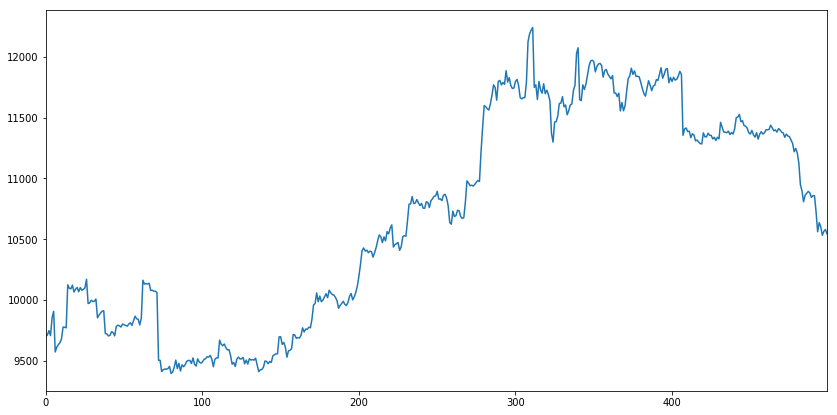

In [4]:
response = requests.get('https://api.cryptowat.ch/markets/gemini/btcusd/ohlc', params={'periods': PERIODS})
data = response.json()

# convert to DataFrame
df = pd.DataFrame(
    data['result'][PERIODS],
    columns=[
        'CloseTime',
        'OpenPrice',
        'HighPrice',
        'LowPrice',
        'ClosePrice',
        'Volume',
        'NA'
    ]
)

print(df.head())
df['ClosePrice'].plot(figsize=(14, 7))